In [4]:
import pandas as pd

data = pd.read_csv('/home/andrw/script/repository/McGill/data/spamdata.csv')
data.describe()
print(data.head(n=2))

   make   address   all   3d   our   over   remove   internet   order   mail  \
0  0.00      0.64  0.64  0.0  0.32   0.00     0.00       0.00     0.0   0.00   
1  0.21      0.28  0.50  0.0  0.14   0.28     0.21       0.07     0.0   0.94   

   ...     semicol   parentheses   backet   exclamation   dollar   sharp  \
0  ...         0.0         0.000      0.0         0.778     0.00   0.000   
1  ...         0.0         0.132      0.0         0.372     0.18   0.048   

    length_average   length_longest   length_total   spam  
0            3.756               61            278      1  
1            5.114              101           1028      1  

[2 rows x 58 columns]


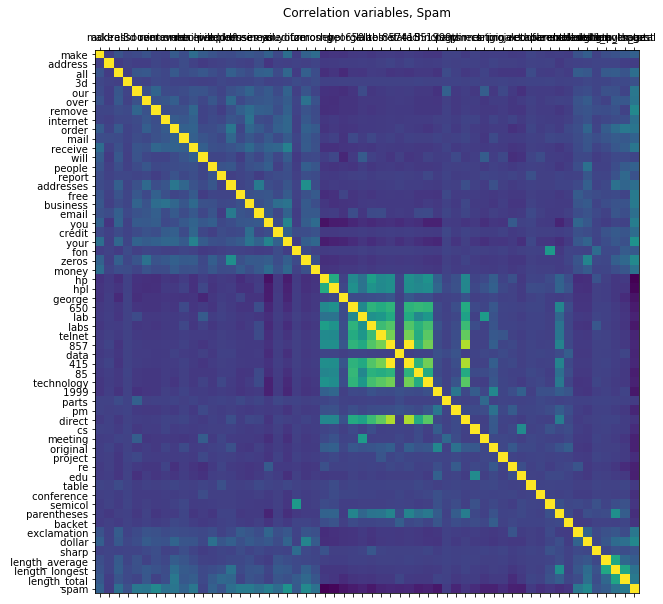

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

corr = data.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax.matshow(corr)

plt.title('Correlation variables, Spam');
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

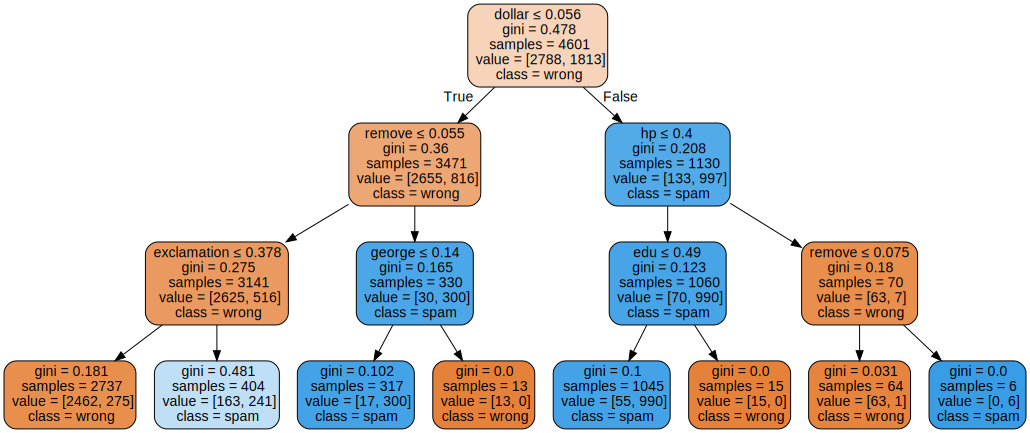

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


dt = DecisionTreeClassifier(max_depth=3)
X = data.values[:, :57]
y = data.values[: , -1]
dt.fit(X,y)
spamnames = data.columns.tolist()[:57]

dot_data = export_graphviz(dt, out_file=None,
                          feature_names = spamnames, class_names=['ham','spam'], filled= True , rounded = True,
                          special_characters =True)

import graphviz
graph = graphviz.Source(dot_data)
graph

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(type(X))

dt10 = DecisionTreeClassifier(max_depth=4)
dt10.fit(X_train,y_train)
y10_pred = dt10.predict(X_test)

accuracy_score( y_test, y10_pred)

<class 'numpy.ndarray'>


0.89142236699239952

In [36]:
bag = BaggingClassifier(n_estimators=10,random_state=1)
bag.fit(X_train,y_train)
y_bag = bag.predict(X_test)
accuracy_score(y_test,y_bag)

0.95005428881650378